In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns

In [2]:
df_weather = pd.read_csv("weather_features.csv")
df_energy = pd.read_csv("energy_dataset.csv")

In [3]:
df_weather_columns_renamed = {'dt_iso':'Time', 
                   'city_name':'City', 
                   'temp':'Temperature', 
                   'temp_min':'Temperature_Min', 
                   'temp_max':'Temperature_Max', 
                   'pressure':'Pressure',
                   'humidity':'Humidity', 
                   'wind_speed':'Wind_Speed', 
                   'wind_deg':'Wind_Deg', 
                   'rain_1h':'Rain_1H', 
                   'rain_3h':'Rain_3H', 
                   'snow_3h':'Snow_3H',
                   'clouds_all':'Clouds_All', 
                   'weather_id':'Weather_Id', 
                   'weather_main':'Weather_Main', 
                   'weather_description':'Weather_Description',
                   'weather_icon':'Weather_Icon'}

df_weather.rename(columns=df_weather_columns_renamed,inplace=True)
del df_weather_columns_renamed

In [4]:
df_energy_columns_renamed = {
    'time':'Time', 
    'generation biomass':'Generaiton_Biomass', 
    'generation fossil brown coal/lignite': 'Generaiton_Fossil_Brown_Coal_Lignite',
    'generation fossil coal-derived gas': 'Generaiton_Fossil_Coal_Derived_Gas', 
    'generation fossil gas' : 'Generaiton_Fossil_Gas',
    'generation fossil hard coal': 'Generaiton_Fossil_Hard_Coal', 
    'generation fossil oil': 'Generaiton_Fossil_Oil',
    'generation fossil oil shale': "Generation_Fossil_Oil_Shale", 
    'generation fossil peat': 'Generaiton_Fossil_Peat',
    'generation geothermal': 'Generation_Geothermal', 
    'generation hydro pumped storage aggregated': 'Generation_Hydro_Pumped_Storage_Aggregated',
    'generation hydro pumped storage consumption': 'Generation_Hydro_Pumped_Storage_Consumption',
    'generation hydro run-of-river and poundage': 'Generation_Hydro_Run_Of_River_And_Poundage',
    'generation hydro water reservoir' : 'Generation_Hydro_Reservoir', 
    'generation marine': 'Generation_Marine',
    'generation nuclear': 'Generation_Nuclear', 
    'generation other': 'Generation_Other', 
    'generation other renewable' : 'Generation_Other_Renewable',
    'generation solar' : 'Generation_Solar', 
    'generation waste' : 'Generation_Waste', 
    'generation wind offshore': 'Generation_Wind_Offshore',
    'generation wind onshore': 'Generation_Wind_Onshore', 
    'forecast solar day ahead': 'Forecast_Solar_Day_Ahead',
    'forecast wind offshore eday ahead': 'Forecast_Wind_Offshore_Eday_Ahead', 
    'forecast wind onshore day ahead': 'Forecast_Wind_Onshore_Eday_Ahead',
    'total load forecast': 'Total_Load_Forecast', 
    'total load actual': 'Total_Load_Actual', 
    'price day ahead': 'Price_Day_Ahead',
    'price actual': 'Price_Actual'
}
df_energy.rename(columns=df_energy_columns_renamed,inplace=True)
del df_energy_columns_renamed

In [5]:
DATETIME_FORMAT = "%Y-%m-%d %H:%M:%S%z"
df_energy['Time'] = pd.to_datetime(df_energy['Time'], format=DATETIME_FORMAT ,utc=True)
df_weather['Time'] = pd.to_datetime(df_weather['Time'], format=DATETIME_FORMAT ,utc=True)
del DATETIME_FORMAT

In [6]:
df_full_data = pd.merge(df_energy,df_weather,how="outer")

In [7]:
del df_energy
del df_weather

In [8]:
# df_full_data[df_full_data['Time'].dt.strftime('%Y-%m-%d') == '2016-01-01']

In [9]:
df_full_data.City.unique()

array(['Valencia', 'Madrid', 'Bilbao', ' Barcelona', 'Seville'],
      dtype=object)

In [10]:
df_full_data.drop(["Generation_Hydro_Pumped_Storage_Aggregated","Forecast_Wind_Offshore_Eday_Ahead"],axis=1,inplace=True)

In [11]:
df_full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178396 entries, 0 to 178395
Data columns (total 43 columns):
 #   Column                                       Non-Null Count   Dtype              
---  ------                                       --------------   -----              
 0   Time                                         178396 non-null  datetime64[ns, UTC]
 1   Generaiton_Biomass                           178301 non-null  float64            
 2   Generaiton_Fossil_Brown_Coal_Lignite         178306 non-null  float64            
 3   Generaiton_Fossil_Coal_Derived_Gas           178306 non-null  float64            
 4   Generaiton_Fossil_Gas                        178306 non-null  float64            
 5   Generaiton_Fossil_Hard_Coal                  178306 non-null  float64            
 6   Generaiton_Fossil_Oil                        178301 non-null  float64            
 7   Generation_Fossil_Oil_Shale                  178306 non-null  float64            
 8   Generaiton_Fos

In [12]:
data = df_full_data[(df_full_data.City == 'Madrid') &
    (df_full_data["Weather_Main"] == 'thunderstorm') & 
    (df_full_data["Time"].dt.strftime("%Y") == "2018")
                    ].groupby(df_full_data.Time)[
                ['Pressure',
                 'Temperature',
                 "Humidity",
                 "Wind_Speed",
                 "Generation_Wind_Onshore",
                 "Forecast_Wind_Onshore_Eday_Ahead"
                ]
            ].mean()

In [13]:
data = df_full_data[
    (df_full_data.City == 'Madrid') & 
    (df_full_data["Weather_Main"] == 'thunderstorm')].groupby(df_full_data.Time.dt.hour)[
                ['Pressure',
                 'Temperature',
                 "Humidity",
                 "Wind_Speed",
                 "Generation_Wind_Onshore",
                 "Forecast_Wind_Onshore_Eday_Ahead"
                ]
            ].mean()

In [14]:
sns.set_theme(style="white",palette="Paired")
sns.set_context("paper")
#sns.color_palette("Set2")

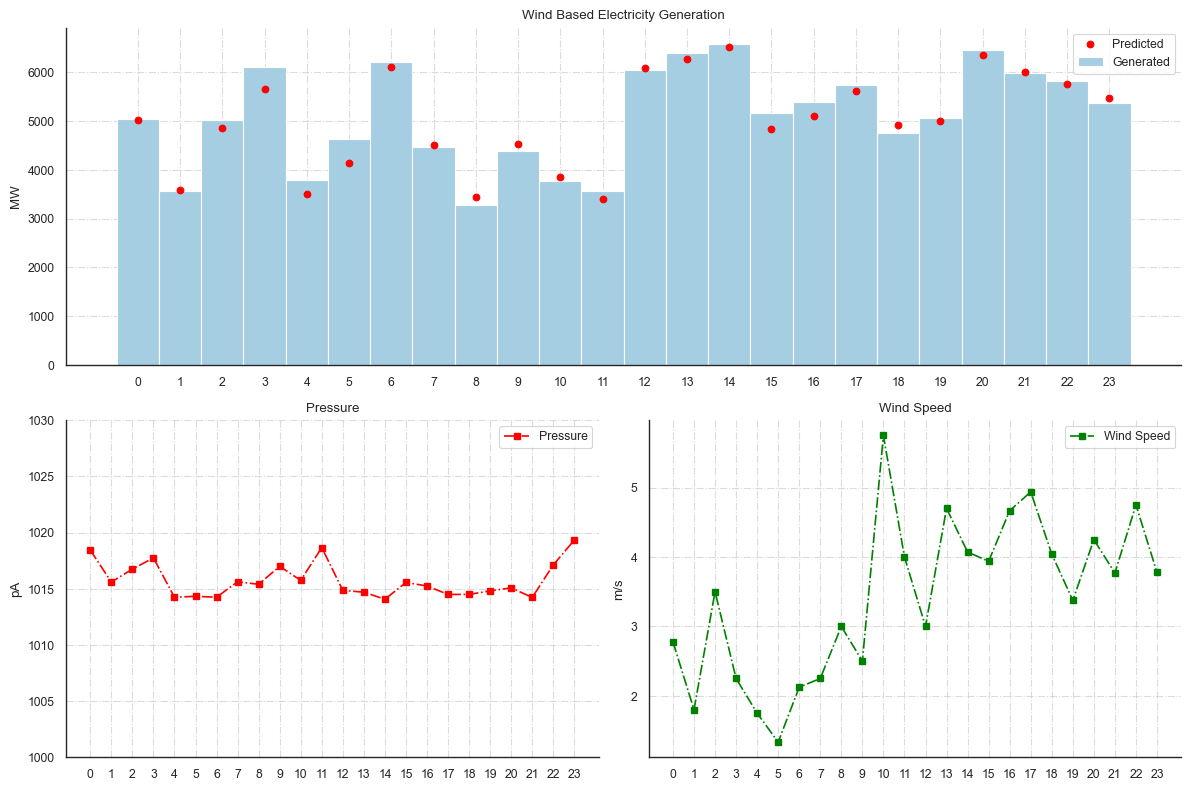

In [16]:
x = data.index


fig = plt.figure(figsize=(12,8))


ax1 = plt.subplot2grid((2,2),(0,0),colspan=2)
ax1.bar(x,
        data.Generation_Wind_Onshore,
        width=1,
        label="Generated")
ax1.scatter(x,
           data.Forecast_Wind_Onshore_Eday_Ahead,
           c="r",
           label='Predicted')
ax1.set_xticks(x,x)
ax1.set_title('Wind Based Electricity Generation')
ax1.set_ylabel("MW")

ax1.grid(True,alpha=0.7,ls="-.")
ax1.legend(loc='best')
sns.despine()



ax2 = plt.subplot2grid((2,2),(1,0),colspan=1)
ax2.plot(x,
        data.Pressure,
        "rs-.",
        label='Pressure')

ax2.set_title('Pressure')
ax2.set_ylim(1000,1030)
ax2.grid(True,alpha=0.7,ls="-.")
ax2.set_xticks(x,x)
ax2.set_ylabel("pA")
ax2.legend(loc='best')
sns.despine()


ax3 = plt.subplot2grid((2,2),(1,1),colspan=1)
ax3.plot(x,
        data.Wind_Speed,
        "gs-.",
        label="Wind Speed")
ax3.set_title('Wind Speed')
ax3.grid(True,alpha=0.7,ls="-.")
ax3.set_xticks(x,x)
ax3.set_ylabel("m/s")
ax3.legend(loc='best')
sns.despine()


plt.tight_layout()
plt.show()